In [66]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('Housing.csv')

# Inspecting the first few rows
print(df.head())
print(df.dtypes) 

print(df.describe())  # Provides a summary of statistics for numerical columns
print(df['furnishingstatus'].value_counts()) 

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price                int64
area                 int64
bedrooms             int64
bathrooms         

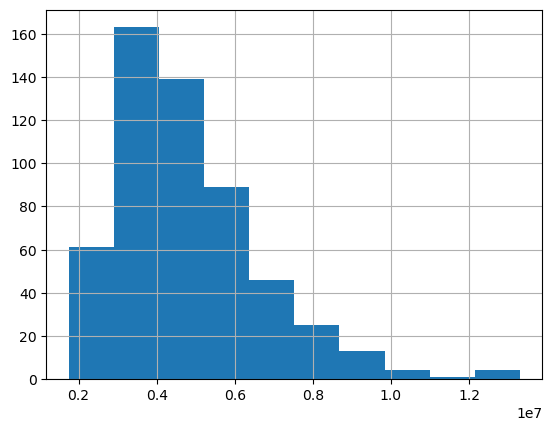

In [67]:
import matplotlib.pyplot as plt

# Ploting the distribution of the price
df['price'].hist()
plt.show()

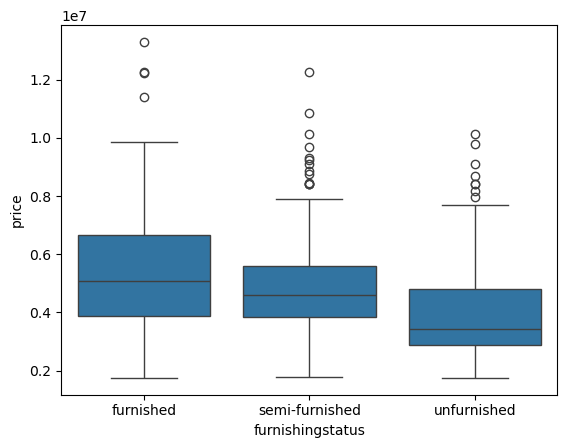

In [68]:
# To compare the price distribution across different furnishing statuses
import seaborn as sns

sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.show()

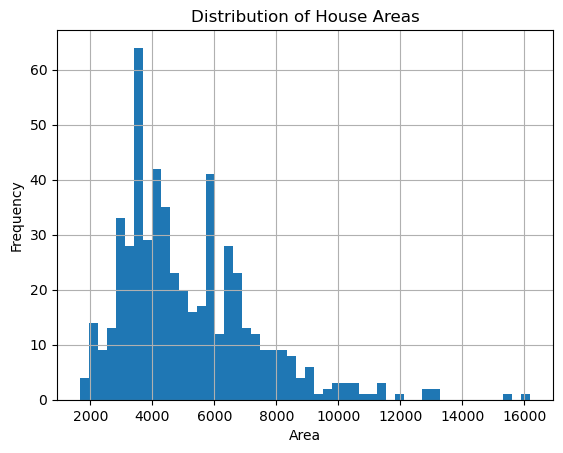

In [69]:
# Histogram of 'area'
df['area'].hist(bins=50)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of House Areas')
plt.show()

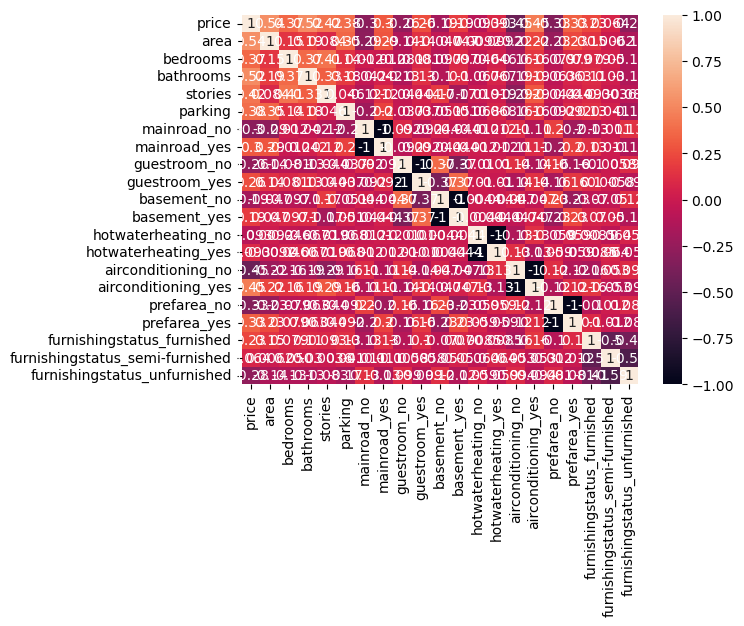

In [70]:
import numpy as np

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df)

# Computing the correlation matrix on the encoded DataFrame
correlation_matrix = df_encoded.corr()

# Ploting the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [71]:
from scipy import stats

# T-test between prices of houses with and without air conditioning
group1 = df[df['airconditioning'] == 'yes']['price']
group2 = df[df['airconditioning'] == 'no']['price']
t_stat, p_val = stats.ttest_ind(group1, group2)

print('T-statistic:', t_stat)
print('P-value:', p_val)


T-statistic: 11.839033782035843
P-value: 6.310969853530074e-29


In [72]:
# Checking for NaNs in the DataFrame
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [73]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Categorical columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [74]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [75]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [76]:
from sklearn.metrics import mean_absolute_error

for col in categorical_cols:
    # Checking if there are NaNs in the column
    if df[col].isna().any():
        print(f"NaNs found in {col}. Filling with 'Unknown'.")
        df[col] = df[col].fillna('Unknown')

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
for column in binary_columns:
    if column in df.columns:
        df[column] = df[column].map({'yes': 1, 'no': 0})

df = pd.get_dummies(df, columns=[col for col in categorical_cols if col not in binary_columns], drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

if 'price' in df.columns:
    X = df.drop('price', axis=1)
    y = df['price']
else:
    raise ValueError("'price' column not found in DataFrame.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Calculating L1 Loss
l1_loss = mean_absolute_error(y_test, predictions)
print('L1 Loss (MAE):', l1_loss)

Mean Squared Error: 1754318687330.664
L1 Loss (MAE): 970043.4039201635


In [77]:
from sklearn.metrics import mean_squared_error

# Calculating L2 Loss
l2_loss = mean_squared_error(y_test, predictions)
print('L2 Loss (MSE):', l2_loss)

L2 Loss (MSE): 1754318687330.664


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

# Loading the dataset
df = pd.read_csv('Housing.csv')

# Identifying categorical columns excluding 'furnishingstatus'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('furnishingstatus')

# Performing one-hot encoding for the categorical columns
df = pd.get_dummies(df, columns=categorical_cols)

# Performing one-hot encoding for the 'furnishingstatus' column
# This creates a new column for each category in 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)

# The target variable is one of the new columns created from 'furnishingstatus'
# Replace 'furnishingstatus_Furnished' with the actual name of the column
# created from one-hot encoding the 'furnishingstatus' column for the category 'Furnished'
y = df['furnishingstatus_furnished']

# The feature set should include all columns except the target variable
X = df.drop(columns=['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Classifier
model = DecisionTreeClassifier()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
predictions = model.predict(X_test)

# Evaluating the model using accuracy score
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

# Calculating Log Loss, assuming binary classification for `mainroad`
logloss = log_loss(y_test, predictions)
print('Log Loss (Binary Cross-Entropy):', logloss)


Accuracy: 0.6513761467889908
Log Loss (Binary Cross-Entropy): 12.56567732831607


In [105]:
# For classification report
print(classification_report(y_test, predictions))

# For R-squared (regression)
r_squared = model.score(X_test, y_test)
print('R-squared:', r_squared)

              precision    recall  f1-score   support

       False       0.78      0.74      0.76        80
        True       0.36      0.41      0.39        29

    accuracy                           0.65       109
   macro avg       0.57      0.58      0.57       109
weighted avg       0.67      0.65      0.66       109

R-squared: 0.6513761467889908


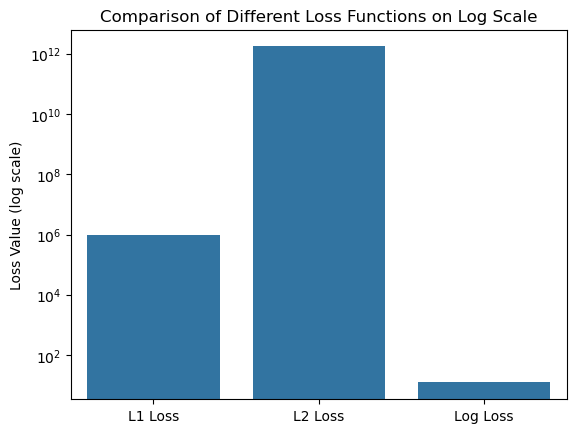

In [106]:
loss_values = [l1_loss, l2_loss, logloss]
loss_types = ['L1 Loss', 'L2 Loss', 'Log Loss']

# Visual comparison of loss functions on a log scale
sns.barplot(x=loss_types, y=loss_values)
plt.yscale('log')
plt.ylabel('Loss Value (log scale)')
plt.title('Comparison of Different Loss Functions on Log Scale')
plt.show()

In [107]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler

# Applying a kernel transformation using RBF kernel
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X_train)

# Fitting model in transformed feature space
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model.fit(X_features, y_train)

# Transforming test set and predict
X_test_features = rbf_feature.transform(X_test)
predictions = model.predict(X_test_features)

# Evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy after RBF kernel transformation:', accuracy)

Accuracy after RBF kernel transformation: 0.7339449541284404


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Using a small subset of the data to increase the chance of overfitting
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(
    X, y, test_size=0.99, random_state=42
)

# Using a model that's too complex for the small dataset
overfit_model = LinearRegression()
overfit_model.fit(X_small_train, y_small_train)

# Predicting using the model
small_train_predictions = overfit_model.predict(X_small_train)
small_test_predictions = overfit_model.predict(X_small_test)

# Checking for overfitting by comparing training error to test error
overfit_train_mse = mean_squared_error(y_small_train, small_train_predictions)
overfit_test_mse = mean_squared_error(y_small_test, small_test_predictions)

print(f'Training MSE: {overfit_train_mse}')
print(f'Test MSE: {overfit_test_mse}')

Training MSE: 1.2281854319476455e-26
Test MSE: 9.090922803104384


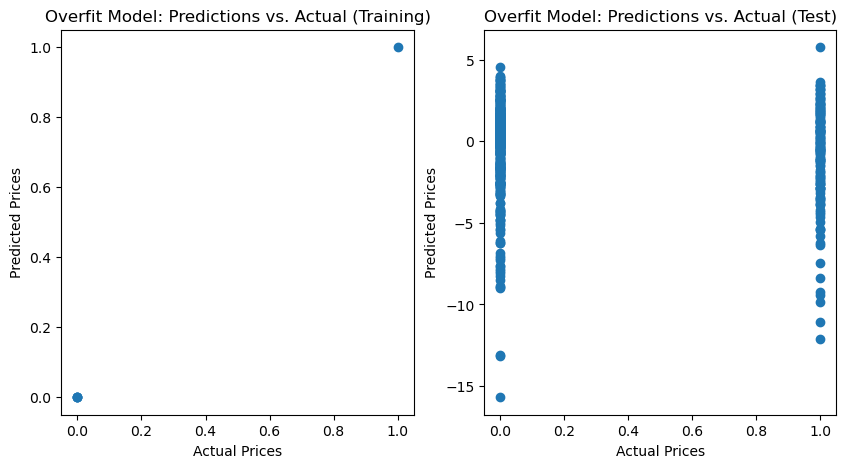

In [109]:
# Plotting the difference in errors
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_small_train, small_train_predictions)
plt.title('Overfit Model: Predictions vs. Actual (Training)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.subplot(1, 2, 2)
plt.scatter(y_small_test, small_test_predictions)
plt.title('Overfit Model: Predictions vs. Actual (Test)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Scaling the features
scaler = StandardScaler()
X_small_train_scaled = scaler.fit_transform(X_small_train)
X_small_test_scaled = scaler.transform(X_small_test)

# Fitting the Ridge model on the scaled training data
ridge_model = Ridge(alpha=1.0, max_iter=10000)
ridge_model.fit(X_small_train_scaled, y_small_train)
ridge_predictions = ridge_model.predict(X_small_test_scaled)

# Fitting the Lasso model on the scaled training data
lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(X_small_train_scaled, y_small_train)
lasso_predictions = lasso_model.predict(X_small_test_scaled)

# Calculating MSE for the Ridge model
ridge_train_mse = mean_squared_error(y_small_train, ridge_model.predict(X_small_train_scaled))
ridge_test_mse = mean_squared_error(y_small_test, ridge_predictions)

# Calculating MSE for the Lasso model
lasso_train_mse = mean_squared_error(y_small_train, lasso_model.predict(X_small_train_scaled))
lasso_test_mse = mean_squared_error(y_small_test, lasso_predictions)

# Printing the MSE for both models
print('Ridge Regularization:')
print('Training MSE:', ridge_train_mse)
print('Test MSE:', ridge_test_mse)

print('\nLasso Regularization:')
print('Training MSE:', lasso_train_mse)
print('Test MSE:', lasso_test_mse)

Ridge Regularization:
Training MSE: 0.0006191325958205759
Test MSE: 0.27058188104157155

Lasso Regularization:
Training MSE: 0.010000000000000018
Test MSE: 0.24861111111111112


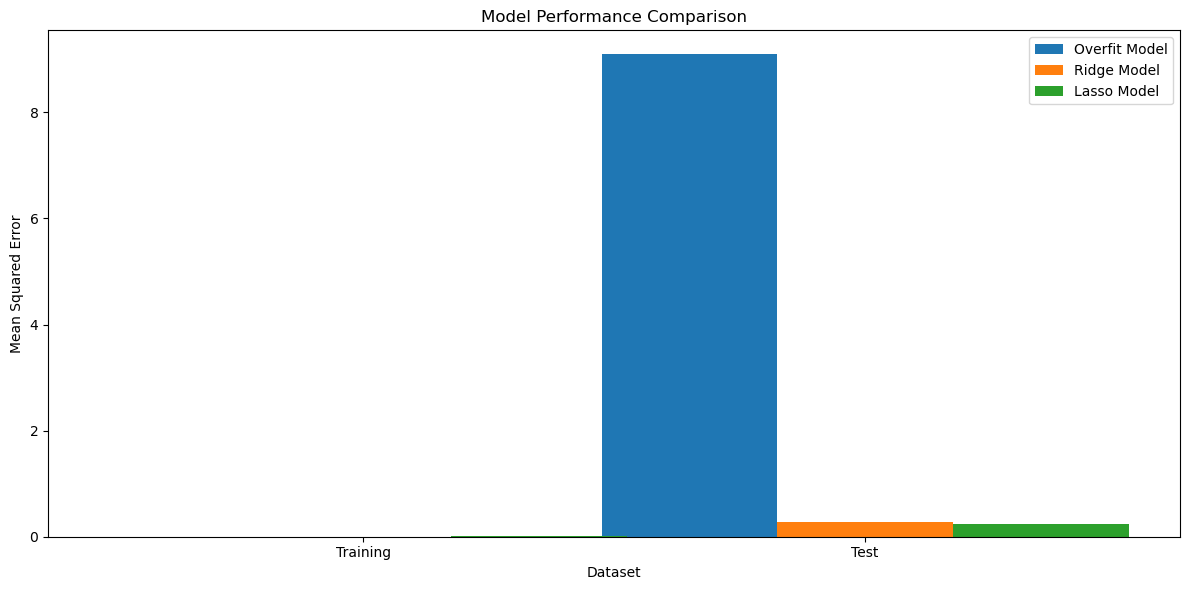

In [111]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(2)

overfit_mse = [overfit_train_mse, overfit_test_mse]
ridge_mse = [ridge_train_mse, ridge_test_mse]
lasso_mse = [lasso_train_mse, lasso_test_mse]

# Plotting Overfit Model MSE
plt.bar(index, overfit_mse, bar_width, label='Overfit Model')

# Plotting Ridge Model MSE
plt.bar(index + bar_width, ridge_mse, bar_width, label='Ridge Model')

# Plotting Lasso Model MSE
plt.bar(index + 2 * bar_width, lasso_mse, bar_width, label='Lasso Model')

plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, ['Training', 'Test'])
plt.legend()

plt.tight_layout()
plt.show()